<a href="https://colab.research.google.com/github/Shifana-22/Data_Science_Projects/blob/PCOS_detection/Pre_processing_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("readr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)
library(readr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data <- read_csv("/content/PCOS_extended_dataset.csv")

Rows: 2000 Columns: 44
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): II    beta-HCG(mIU/mL), AMH(ng/mL)
dbl (42): Sl. No, Patient File No., PCOS (Y/N), Age (yrs), Weight (Kg), Heig...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
summary(data)

     Sl. No      Patient File No.   PCOS (Y/N)      Age (yrs)    
 Min.   :  1.0   Min.   :  1.0    Min.   :0.000   Min.   :20.00  
 1st Qu.:132.0   1st Qu.:132.0    1st Qu.:0.000   1st Qu.:28.00  
 Median :267.0   Median :267.0    Median :0.000   Median :31.00  
 Mean   :266.6   Mean   :266.6    Mean   :0.304   Mean   :31.35  
 3rd Qu.:395.0   3rd Qu.:395.0    3rd Qu.:1.000   3rd Qu.:35.00  
 Max.   :541.0   Max.   :541.0    Max.   :1.000   Max.   :48.00  
                                                                 
  Weight (Kg)       Height(Cm)         BMI         Blood Group   
 Min.   : 30.74   Min.   :136.5   Min.   :11.94   Min.   :11.00  
 1st Qu.: 52.25   1st Qu.:152.2   1st Qu.:21.77   1st Qu.:13.00  
 Median : 58.54   Median :156.4   Median :24.19   Median :14.00  
 Mean   : 59.53   Mean   :156.4   Mean   :24.28   Mean   :13.79  
 3rd Qu.: 65.52   3rd Qu.:160.1   3rd Qu.:26.60   3rd Qu.:15.00  
 Max.   :113.38   Max.   :180.4   Max.   :40.45   Max.   :18.00  
          

In [ ]:
str(data)

spc_tbl_ [2,000 × 44] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Sl. No                : num [1:2000] 193 360 10 278 71 473 397 315 487 88 ...
 $ Patient File No.      : num [1:2000] 193 360 10 278 71 473 397 315 487 88 ...
 $ PCOS (Y/N)            : num [1:2000] 0 0 0 1 0 1 0 1 1 0 ...
 $ Age (yrs)             : num [1:2000] 30 36 36 29 33 26 31 34 30 40 ...
 $ Weight (Kg)           : num [1:2000] 70 63.7 51.8 66.9 52.5 ...
 $ Height(Cm)            : num [1:2000] 168 154 149 149 151 ...
 $ BMI                   : num [1:2000] 23.2 25.4 23.9 27.9 23.1 ...
 $ Blood Group           : num [1:2000] 12 13 15 15 13 11 15 11 11 11 ...
 $ Pulse rate(bpm)       : num [1:2000] 72 70 80 72 72 72 72 78 74 80 ...
 $ RR (breaths/min)      : num [1:2000] 22 18 20 18 18 18 18 20 18 20 ...
 $ Hb(g/dl)              : num [1:2000] 12 10.5 10 12 10.2 12 12.8 11 11.7 10.3 ...
 $ Cycle(R/I)            : num [1:2000] 4 2 4 4 2 2 2 2 4 2 ...
 $ Cycle length(days)    : num [1:2000] 5 6 2 5 5 5 6 6 2 5 ...
 $ M

CHECK MISSING DATA VALUES

In [ ]:
# Check for missing values
missing_values <- colSums(is.na(data))
print(missing_values)

                Sl. No       Patient File No.             PCOS (Y/N) 
                     0                      0                      0 
             Age (yrs)            Weight (Kg)             Height(Cm) 
                     0                      0                      0 
                   BMI            Blood Group        Pulse rate(bpm) 
                     0                      0                      0 
      RR (breaths/min)               Hb(g/dl)             Cycle(R/I) 
                     0                      0                      0 
    Cycle length(days)  Marraige Status (Yrs)          Pregnant(Y/N) 
                     0                      3                      0 
      No. of abortions   I   beta-HCG(mIU/mL) II    beta-HCG(mIU/mL) 
                     0                      0                      0 
           FSH(mIU/mL)             LH(mIU/mL)                 FSH/LH 
                     0                      0                      0 
             Hip(inc

In [ ]:
# Check for duplicates
duplicates <- data[duplicated(data), ]
print(duplicates)


# A tibble: 0 × 44
# ℹ 44 variables: Sl. No <dbl>, Patient File No. <dbl>, PCOS (Y/N) <dbl>,
#   Age (yrs) <dbl>, Weight (Kg) <dbl>, Height(Cm) <dbl>, BMI <dbl>,
#   Blood Group <dbl>, Pulse rate(bpm) <dbl>, RR (breaths/min) <dbl>,
#   Hb(g/dl) <dbl>, Cycle(R/I) <dbl>, Cycle length(days) <dbl>,
#   Marraige Status (Yrs) <dbl>, Pregnant(Y/N) <dbl>, No. of abortions <dbl>,
#   I   beta-HCG(mIU/mL) <dbl>, II    beta-HCG(mIU/mL) <chr>,
#   FSH(mIU/mL) <dbl>, LH(mIU/mL) <dbl>, FSH/LH <dbl>, Hip(inch) <dbl>, …


In [ ]:
# Remove duplicates
cleaned_data <- distinct(data)


# DATA VISUALIZATION

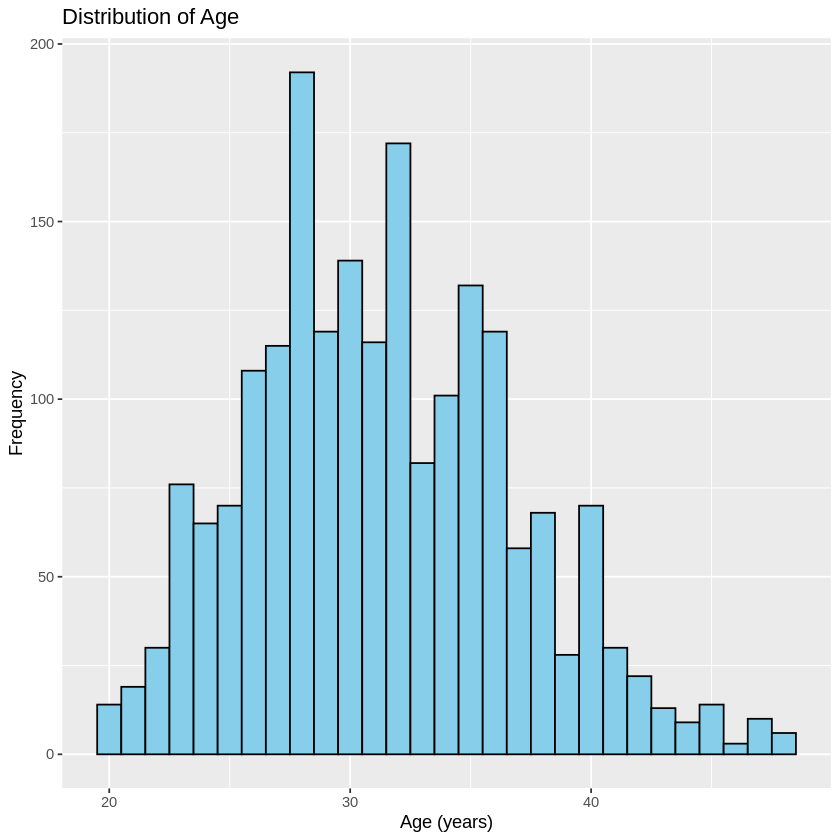

In [ ]:
# Visualization - Histogram of Age
ggplot(data, aes(x = `Age (yrs)`)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Age",
       x = "Age (years)",
       y = "Frequency")


In [ ]:
mydata1 <- read.csv("pcos.csv")


In [ ]:
library(ggplot2)


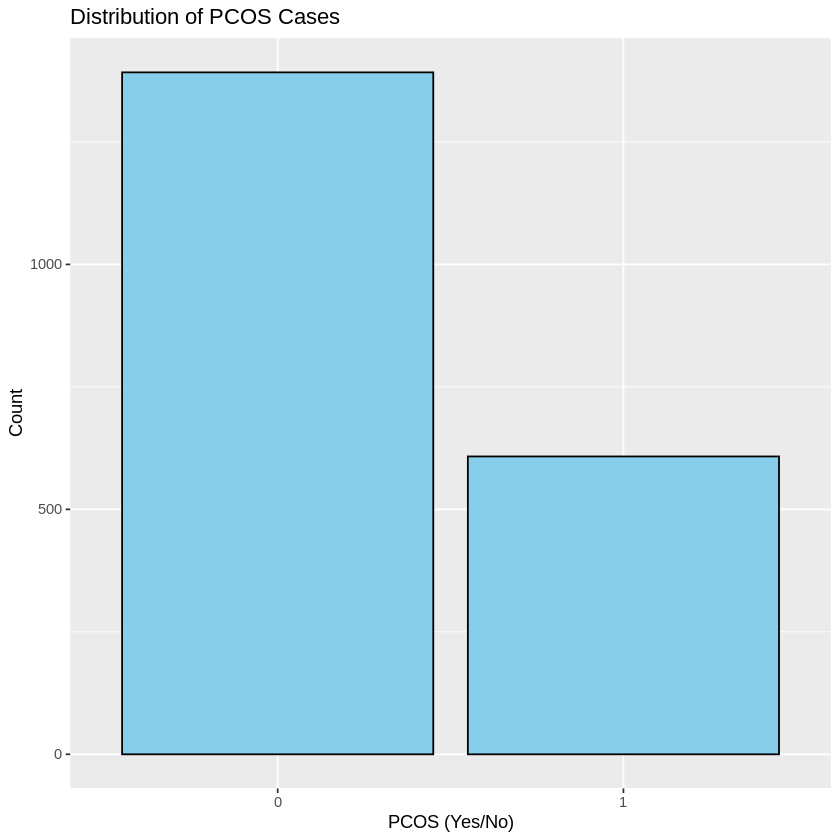

In [ ]:
# Visualization - Bar plot of PCOS cases
pcos_counts <- data %>%
  count(`PCOS (Y/N)`)

ggplot(pcos_counts, aes(x = factor(`PCOS (Y/N)`), y = n)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(title = "Distribution of PCOS Cases",
       x = "PCOS (Yes/No)",
       y = "Count")


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message:
“Removed 3 rows containing non-finite values (`stat_bin()`).”


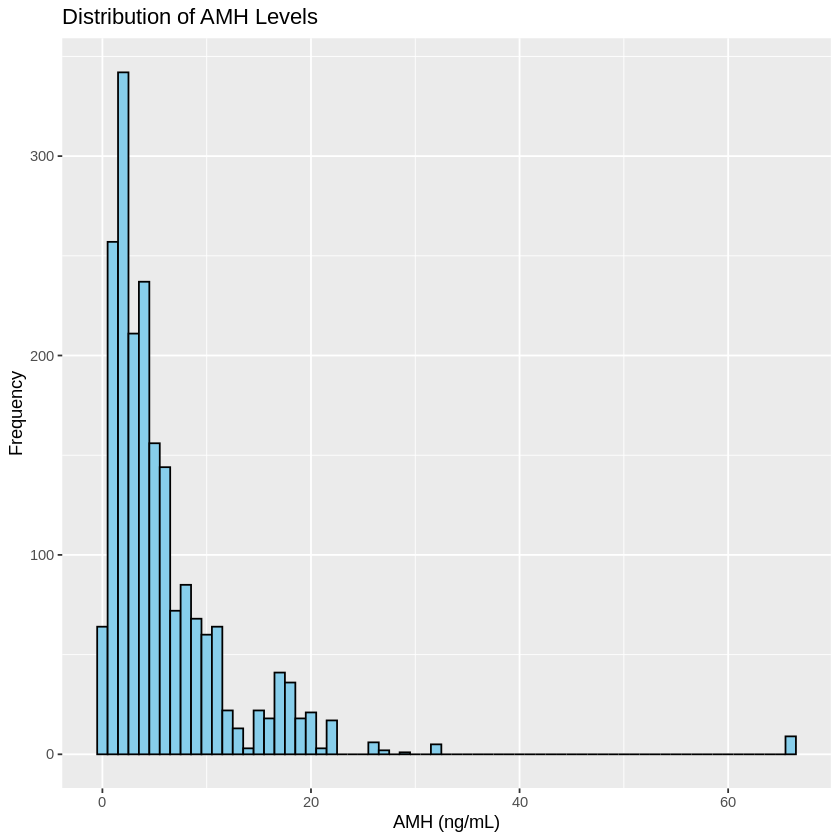

In [ ]:
# Convert AMH column to numeric
data$`AMH(ng/mL)` <- as.numeric(data$`AMH(ng/mL)`)

# Visualization - Histogram of AMH levels
ggplot(data, aes(x = `AMH(ng/mL)`)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Distribution of AMH Levels",
       x = "AMH (ng/mL)",
       y = "Frequency")


BOX PLOT ANALYSIS

In [ ]:
install.packages("tidyverse")
library(tidyverse)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


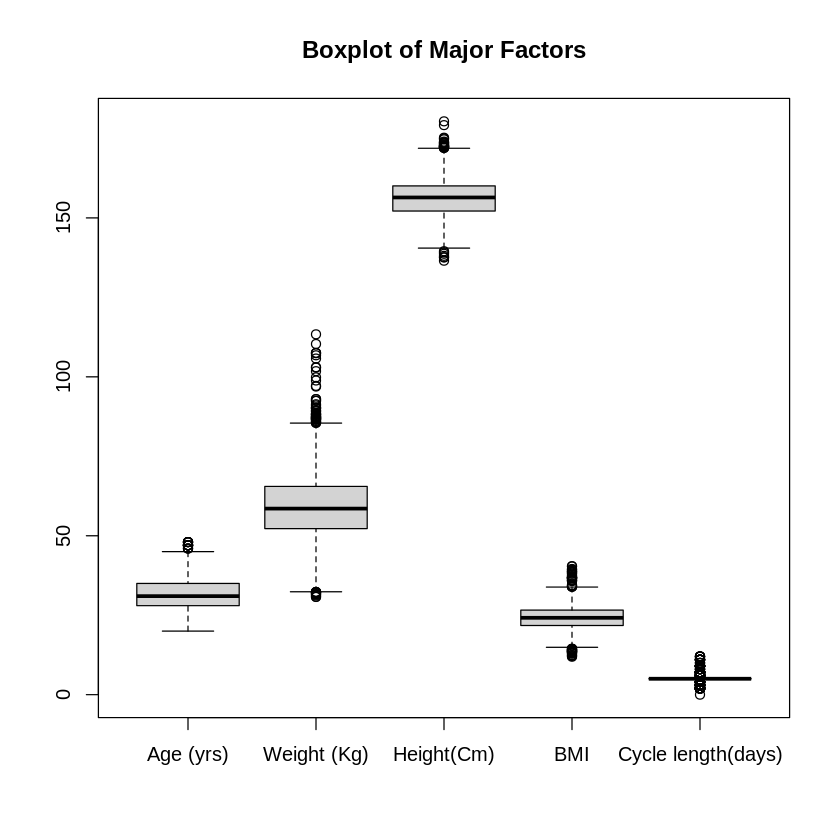

In [ ]:
# Create box plots for major factors
boxplot_data <- data[, c("Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", "Cycle length(days)")]
boxplot(boxplot_data, main = "Boxplot of Major Factors")


TOTAL AND AVERAGE NUMBER OF CASES

In [ ]:
# Calculate total number of cases and average daily cases across all countries
total_cases <- nrow(data)
average_daily_cases <- mean(data$`PCOS (Y/N)`)

# Print the results
print(paste("Total number of cases:", total_cases))
print(paste("Average daily cases across all countries:", average_daily_cases))

[1] "Total number of cases: 2000"
[1] "Average daily cases across all countries: 0.304"
